# League of Legends EDA: Why am I still in Bronze
In this EDA, I will be exploring the aspects of my play that are stopping me from climbing to higher tiers in League of Legends

### Hypothesis:
In order to climb in rank, I need to focus heavily on my CS per minute (minions killed per minute). I think this is the biggest factor that's keeping me trapped in Bronze/Silver
***


## Brief Overview of League of Legends:
League of Legends is MOBA: Multiplayer Online Battle Arena. The arena; "Summoners Rift" consists of 3 Lanes and a Jungle. There are two teams with five players each. 
The objective of the game is to destroy the enemies Nexus (Outlined in Green). To do this you have to destroy turrets (Outlined in Blue). At the center of each lane, waves of "minions" fight. These are small NPCs and they exist so that when they are killed, a certain ammount of gold and experience is given to the player that kills them. If the minions were left alone, they would die/spawn at a constant rate meaning that the minion battle in each lane would remain exactly in the center of each lane. 

The ammount of minions killed by each player is paramount to the outcome of the game because the majority of each players income and experience comes from killing minions. The minions spawn near the nexus in waves. Each wave has 6 minions except every *third* wave includes a larger minion called a cannon totallyng 7. 

With the Gold earned, players can buy items from the shop. Basically, items give the player more power in terms of damage, shielding, vision, health, armor, etc. So the more items a player has, the better they will perform. 

In League of Legends, there are hundreds of different "champions" that the player may choose from. Each champion has different abilities and are specialized for different roles.

Each team consists of 5 unique roles:
- Top Laner
- Mid Laner
- Jungler
- Support: Bottom lane (Helps the ADC)
- ADC: Bottom lane (Attack Damage Carry) 

<img src="Images/map.jpg">


For this EDA, I am analyzing my own Performance as ADC. Specifically as my favorite champion; Xayah. Xayah is a ranged marksman and is great for high damage output.

<img src="Images/xayah - Copy.jpg">

### Vision

Vision is also a very important aspect to the game. As shown below, the shadowy areas are places where there is no vision. You can gain vision of these areas by placing "wards" which light up a radius. Each player starts with two wards and cannot hold more than two. Wards dissapear after about a minute. Each time a ward is placed, the player has to wait a certain time to be able to use another ward (cooldown). You can also buy special wards that detect stealthy enemies and never die unless attacked by an enemy.
<img src="Images/ward.png">

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import scipy.stats as sp
%matplotlib inline

## The Data: 
1. 10 of my personal matches playing Xayah (high bronze) with 26 data points.
    - I played ten matches with the sole purpose of recording data throught the game.
    - Data includes important metrics including
        - Minions Killed (CS) at certain time intervals
        - Damage to other champions
        - Sum of my teams damage to champions
        - Damage to Objectives(Turrets, Nexus, Neuteral Monsters, etc.)
        - Vision Score (wards placed, wards destroyed, etc.)
        - Result of Game (W = Win, L = Loss)


2. Champion match statistics for Xayah in all tiers including my own averages
    - Stats pulled directly from my profile. My profile shows me my performance head to head against different tiers of players that play the same champion
    - Several important metrics, some different than the ones I personally recorded.
    
Note: See Data folder to look at all data points

---

In [2]:
myMatches = 'Data/matchData.csv'
xayah = 'Data/xayahStats.csv'
dfMine = pd.read_csv(myMatches)
dfXayah = pd.read_csv(xayah)

### My matches:

In [3]:
dfMine.head()

,Game,CS(5mins),CS(10mins),CS(15mins),CS(20mins),CS(25 mins),Total CS,csPerMin,Opp. CS,OcsPerMin,...,Support Deaths,Support Kills,Total Team Kills,Total Team Deaths,Team Obj. Damage,Objective Damage,Damage Done,Damage Received,Team Damage Done,Result
0,1,27,52,81,106,128.0,206,5.33,248,6.42,...,11,9,55,34,83573,12845,28587,22851,142679,1
1,2,32,64,100,118,144.0,174,5.78,168,5.58,...,6,2,18,21,31330,11751,11175,15294,62219,0
2,3,25,50,88,122,160.0,173,5.09,152,4.47,...,6,1,22,40,38740,1501,23029,26486,66807,0
3,4,24,48,74,107,152.0,195,5.97,143,4.38,...,13,3,33,43,66552,21097,36960,23156,98464,0
4,5,30,64,96,146,NaN,146,7.23,45,2.16,...,1,2,28,5,55184,14275,12321,9732,48041,1


### Xayah Stats

In [4]:
dfXayah.head()

,Tier,CSperMin,kdaRatio,killPart,damageShare,visionPerHour,killConversionRatio,objectiveCtrlRatio,damagePerDeath,utilityScore,earlyCsAdvantage,Win Rate
0,me(avg),5.7,2.92,55.7,29.4,40.5,30.6,48.7,4691,35.6,22.9,52
1,me(best),7.8,18.00,79.5,45.4,63.2,64.0,85.7,24203,54.7,51.0,na
2,me(worst),4.3,0.75,17.6,16.2,22.4,0.0,0.0,1658,22.0,-17.0,na
3,iron,4.1,1.82,37.4,16.1,22.4,23.0,35.3,2207,17.3,-10.2,na
4,bronze,4.7,2.48,45.1,21.1,27.1,24.4,40.3,3245,22.7,-0.4,na


## Data Visualization:

### Minions killed per minute and outcome of the game

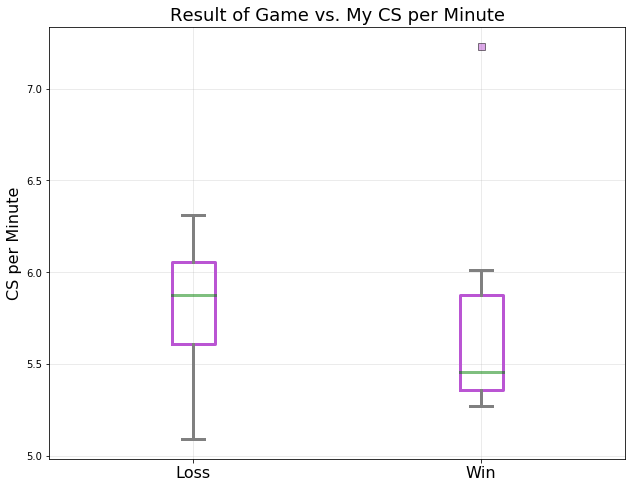

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
resultAndCS = dfMine.loc[(dfMine["Result"]==0) | (dfMine["Result"]==1)].boxplot(column = ["csPerMin"], by="Result", ax = ax, return_type="dict")

for column in resultAndCS:
    
    for box in column['boxes']:
        box.set(color='mediumorchid', linewidth=3)
    
    for whisker in column['whiskers']:
        whisker.set(color='gray', linewidth=3)

    for cap in column['caps']:
        cap.set(color='gray', linewidth=3)

    for cap in column['medians']:
        cap.set(color='green', linewidth=3, alpha=0.5)
 
    for cap in column['fliers']:
        cap.set(markerfacecolor='mediumorchid', linewidth=3, marker='s', markersize=7, alpha=0.5)
        
ax.set_title('Result of Game vs. My CS per Minute', fontsize=18)
ax.set_ylabel("CS per Minute", fontsize=16)

plt.xticks([1,2],["Loss", "Win"], rotation=0, fontsize=16)
plt.suptitle("")
ax.set_xlabel("")
ax.grid(alpha = 0.3)

### Analysis

It appears that I actually had a higher CS rate in the matches that I lost than the matches that I won. Next I will compare my CS rates and my damage output

### Correlation between my CS and match result

In [6]:
# Between my CS per Minute and Result of match
sp.pearsonr(dfMine["csPerMin"], dfMine["Result"])[0]

0.0033918149255721397

### Results:
My CS per minute has a very weak positive correlation with the outcome of the game. Not much to go on in the search for the reason I win/lose

---

## How are combat and CS related?
From the CS vs. Result plot above, there must be a reason that my CS rate is lower on my winning games. I have a feeling that the reason I had a worse CS rate is due to my participation in combat, specifically my Kill participation. Kill participation is a percentage value. It is the number of enemy deaths vs my kills and assists. I've made two separate graphs to show relationship between kill participation and CS.

Text(0.5, 0, 'Match')

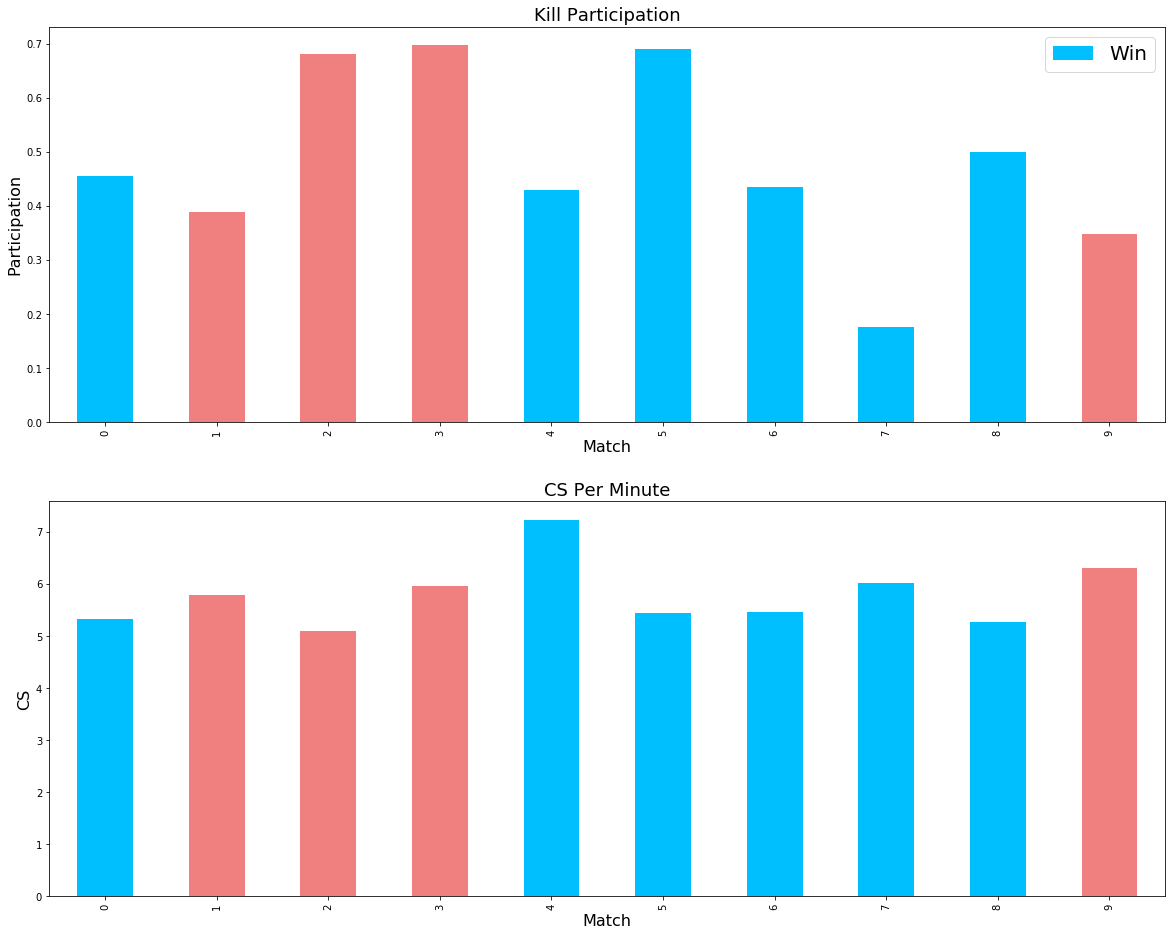

In [7]:
# Calculate Kill participation
part = (dfMine["Kills"] + dfMine["Assists"]) / dfMine["Total Team Kills"]
cpm = (dfMine["csPerMin"])
result = dfMine["Result"]

colors = []
for i in result:
    if(result[i]==1):
        colors.append('lightcoral')
    if(result[i]==0):
        colors.append('deepskyblue')
    
    
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,16))
part.plot.bar(ax = axes[0], color = colors)

axes[0].set_title('Kill Participation', fontsize=18)
axes[0].set_ylabel("Participation", fontsize=16)
axes[0].set_xlabel("Match",fontsize=16)
axes[0].legend(["Win"],fontsize=20)

cpm.plot.bar(ax = axes[1], color = colors)
axes[1].set_title('CS Per Minute', fontsize=18)
axes[1].set_ylabel("CS", fontsize=16)
axes[1].set_xlabel("Match",fontsize=16)



I added the Win/Lose color just to get some idea of how my kill participation affected the match outcome. Here we can see a relationship between my kill praticipation and my CS rate. Intuitively, on average, the more I participate in fights, the less I am able to focus on killing minions and vice versa. So this explains why my CS is lower on games won.

### Correlation between CS and Kill participation

In [8]:
sp.pearsonr(part, cpm)[0]

-0.3831569082106898

So we have a somewhat strong negative correlation between these two dynamics

---

## Damage Share: How does the ammount of damage I deal relate to match result

First I will look at my average damage share (percentage of damage dealt to other champions) for winning and losing games. Then I will compare that to my CS rate.

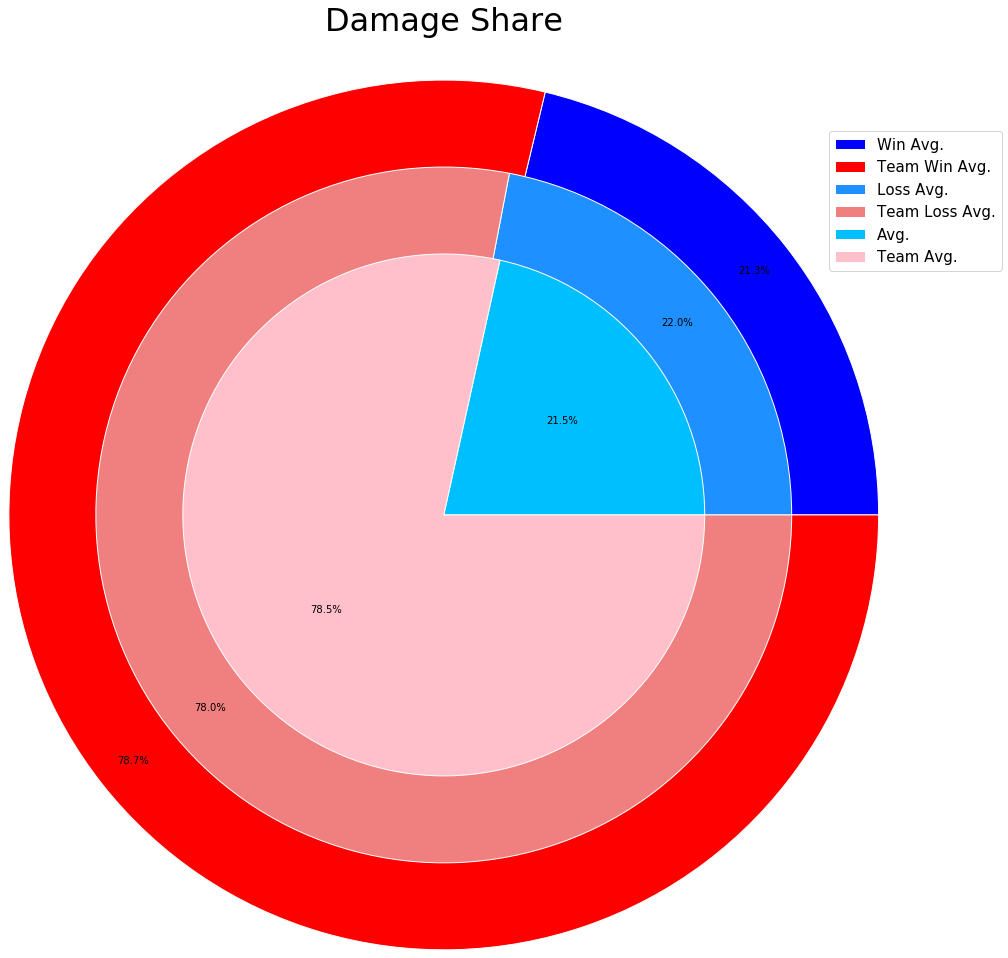

In [9]:
fig, ax = plt.subplots()
size = 3

winDMG = dfMine.loc[dfMine["Result"]==1]
lossDMG = dfMine.loc[dfMine["Result"]==0]

# Stats
pList1 = [sum(winDMG['Damage Done']), sum(winDMG['Team Damage Done'])]
pList2 = [sum(lossDMG['Damage Done']), sum(lossDMG['Team Damage Done'])]
plist3 = [sum(dfMine['Damage Done']), sum(dfMine['Team Damage Done'])]

#Colors
cmap = plt.get_cmap("tab20c")
outC = ['blue','red']
midC = ['dodgerblue','lightcoral']
inC = ['deepskyblue','pink']

ax.pie(pList1, radius= 5,  colors= outC, wedgeprops=dict(width=size-0.2, edgecolor='w'), autopct='%1.1f%%', pctdistance = 0.91)
ax.pie(pList2, radius = 4, colors = midC, wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', pctdistance = 0.87)
ax.pie(plist3, radius = 3, colors = inC, wedgeprops = dict(width=size, edgecolor = 'w'), autopct='%1.1f%%', pctdistance = 0.58)

ax.set_title("Damage Share",y=2.7,fontsize=32)
ax.legend(['Win Avg.', 'Team Win Avg.','Loss Avg.','Team Loss Avg.','Avg.','Team Avg.'],loc=1,bbox_to_anchor=(3.1,2.3),fontsize=15)

It appears that my damage share is consistent across all averages for these ten games. I cannot make any connection to match outcome with the damage share.

## Gold vs. Match Result

Gold is a very important factor in League of Legends so I expect to see a strong correlation to Gold and match result. Since I am only one of five players, my gold will not make or break the match and I failed to include a 'Total Team Gold', column in my data file. This is different from CS per minute because my total gold includes my CS gold, Kill gold, objective gold and more. 

Note: Since All of the match lengths are different, I will have to normalize the data by calculating gold per minute.

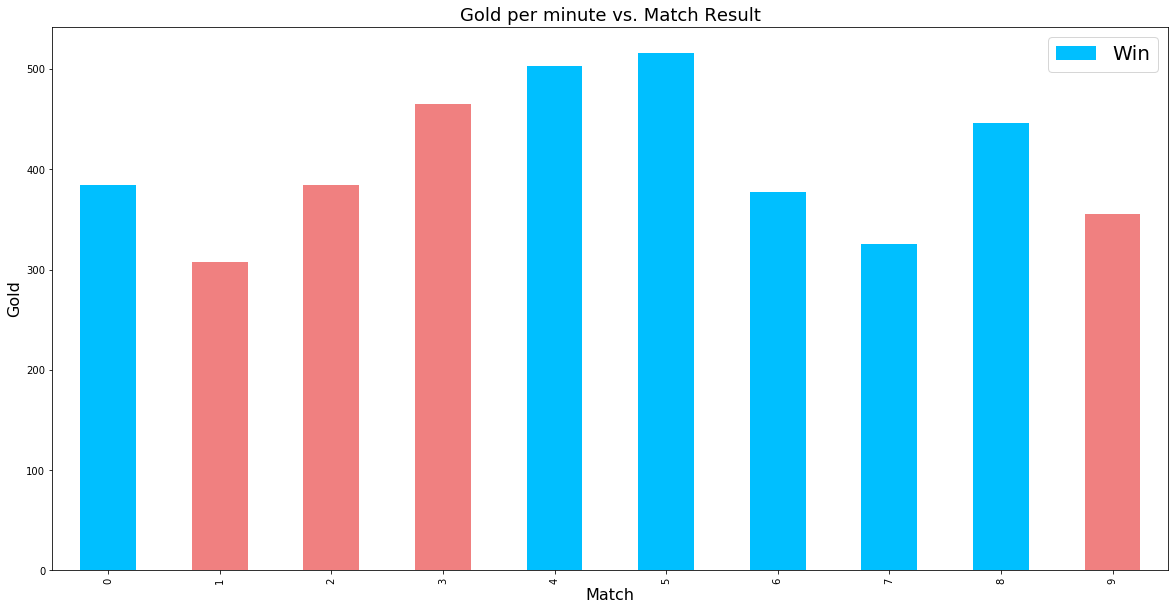

In [10]:
fig, ax = plt.subplots(figsize = (20,10))
gold = dfMine['Gold'] / dfMine['minutes']

colors = []
for i in result:
    if(result[i]==1):
        colors.append('lightcoral')
    if(result[i]==0):
        colors.append('deepskyblue')

gold.plot.bar(ax = ax, color = colors)

ax.set_title('Gold per minute vs. Match Result', fontsize=18)
ax.set_ylabel("Gold", fontsize=16)
ax.set_xlabel("Match",fontsize=16)
ax.legend(["Win"],fontsize=20)

### Correlation between Gold and Match result:

In [11]:
sp.pearsonr(gold, dfMine['Result'])[0]

0.3386225312720462

This is the strongest Positive correlation i've seen thus far. It looks like an important dynamic to focus on while in-game. My starategy now will be to heavily focus on my gold income.

---

## Kill, Death, Assist Ratio:

For my final analysis, I will look into how the combat success of myself and my team effect match outcome.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


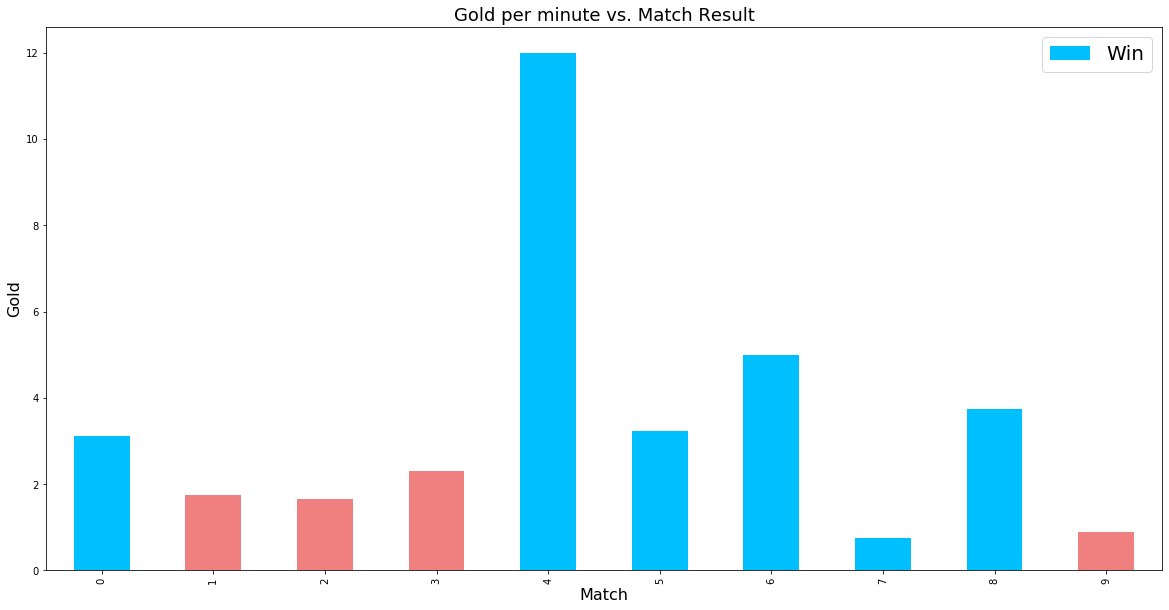

In [12]:
fig, ax = plt.subplots(figsize = (20,10))
ka = (dfMine['Kills'] + dfMine['Assists'])
d = dfMine['Deaths']

# For zero death match
for i in range(len(d+1)):
    if (d[i]==0):
        d[i]=1

kda = ka/d
colors = []
for i in result:
    if(result[i]==1):
        colors.append('lightcoral')
    if(result[i]==0):
        colors.append('deepskyblue')

kda.plot.bar(ax = ax, color = colors)

ax.set_title('Gold per minute vs. Match Result', fontsize=18)
ax.set_ylabel("Gold", fontsize=16)
ax.set_xlabel("Match",fontsize=16)
ax.legend(["Win"],fontsize=20)



This is by far the most promising Indicator. The match result has a clear correlation to match result, to further prove this I will calculate the correlation coefficient.

## Correlation Between KDA and Match Result:

In [13]:
sp.pearsonr(kda, dfMine['Result'])[0]

0.4703018488151105

As I suspected from a graph, this is the strongest factor to the success of a match that I have found

---

# **Conclusion:**

My original hypothesis was **wrong**, but in discovering that CS per minute is not the most important factor, I have found that KDA is far more important than I thought.

As long as a try my best to minimize deaths and help in Team Fights (assists), I will be able to climb out of bronze. As far as kills are concerned, the reason for my deaths is typically a failed attack, so my strategy going forward will be to avoid making risky plays just for some kill gold. 

----

# My Performance Stats:
Now that I have concluded that I should focus more on reducing deaths. Lets see how my gameplay compares to other tiers of Players who play Xayah ADC. This may give me an indicator of what rank I should be if I were to fix my kda issues. 

## Performance Indicators: My Average, Best, and worst performance.

Text(0.5, 0, 'Average, Best, Worst')

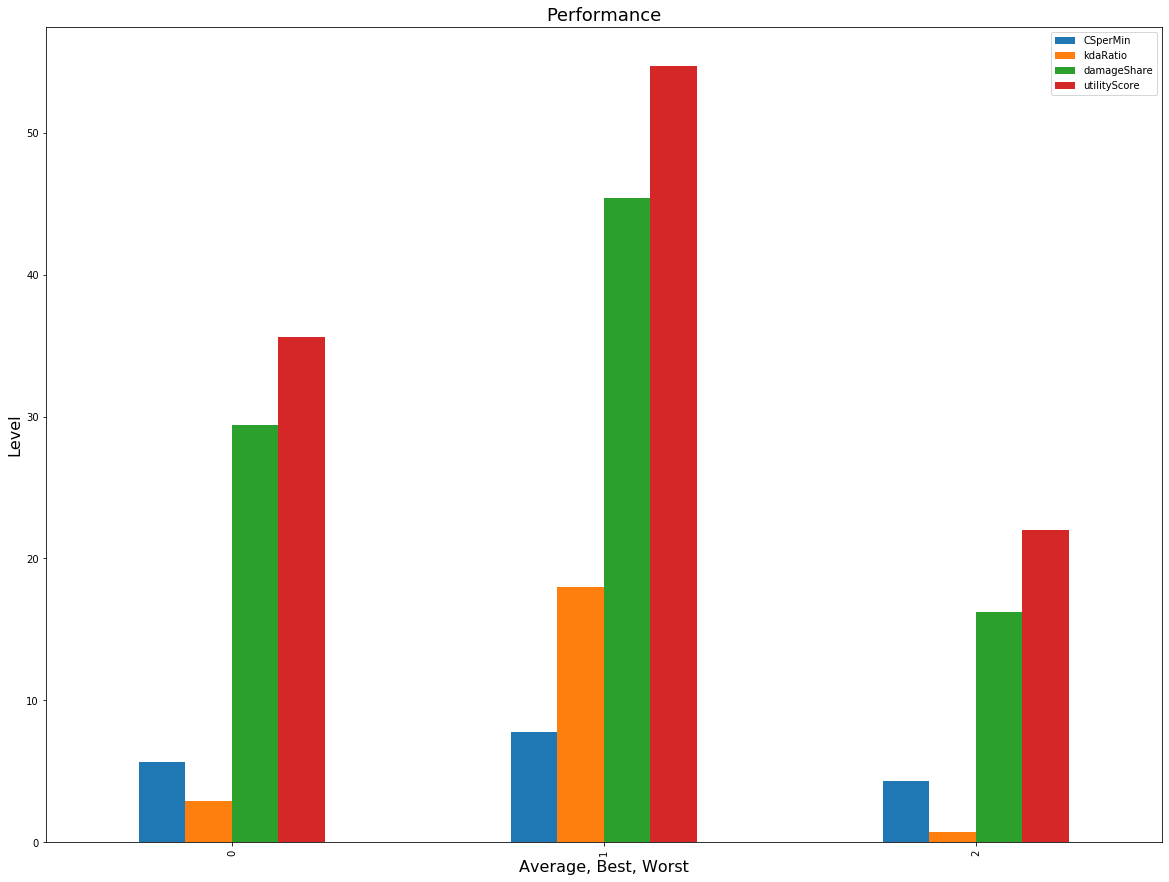

In [14]:
fig, ax = plt.subplots(figsize=(20,15))
my_columns = ['CSperMin','kdaRatio','damageShare','utilityScore']

dfP = dfXayah.loc[(dfXayah['Tier']=='me(best)') | (dfXayah['Tier']=='me(worst)') | (dfXayah['Tier']=='me(avg)')]
dfP[my_columns].plot.bar(ax = ax)

ax.set_title('Performance', fontsize=18)
ax.set_ylabel("Level", fontsize=16)
ax.set_xlabel("Average, Best, Worst",fontsize=16)

## Tiers Comparison:

### My Stats head to head against other Tiers of Xayah Players

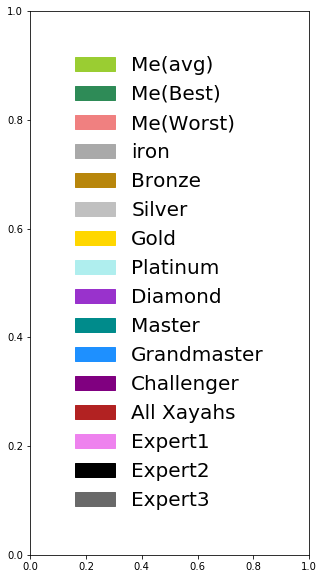

In [15]:

fig = plt.figure(figsize=(5, 10))

myLabels = ['Me(avg)','Me(Best)','Me(Worst)','iron','Bronze','Silver','Gold','Platinum','Diamond','Master','Grandmaster','Challenger','All Xayahs','Expert1','Expert2','Expert3']
myColors = ['yellowgreen','seagreen','lightcoral','darkgrey','darkgoldenrod','silver','gold','paleturquoise','darkorchid','darkcyan','dodgerblue','purple','firebrick','violet','black','dimgray','gray']
patches = [
    mpatches.Patch(color=color, label=label)
    for label, color in zip(myLabels, myColors)]
plt.legend(patches, myLabels, loc='center',frameon=False,fontsize=20)



Text(0.5, 0, 'Tier')

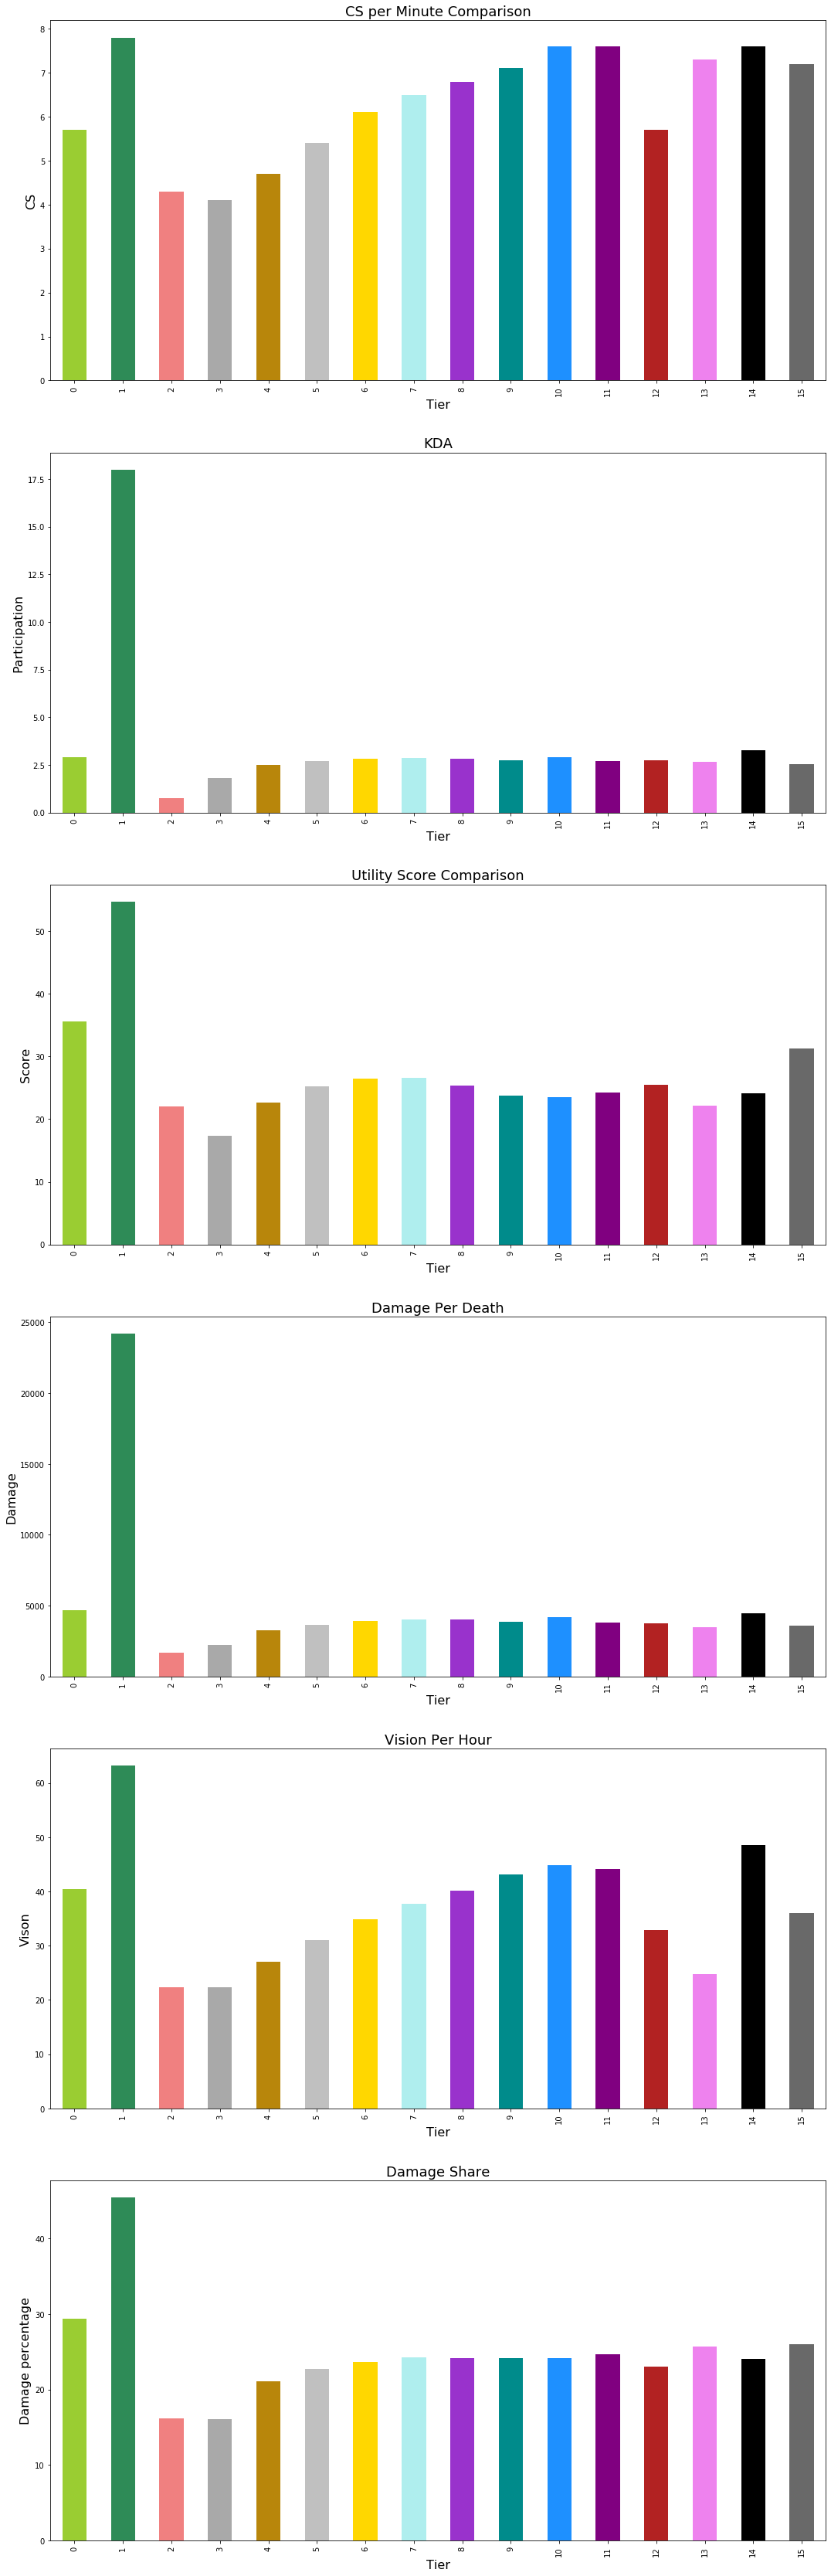

In [16]:

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(18,60))

csComp = dfXayah['CSperMin']
csComp.plot.bar(ax=axes[0], color=myColors)
axes[0].set_title('CS per Minute Comparison', fontsize=18)
axes[0].set_ylabel("CS", fontsize=16)
axes[0].set_xlabel("Tier",fontsize=16)


kd=dfXayah['kdaRatio']
kd.plot.bar(ax=axes[1], color=myColors)
axes[1].set_title('KDA', fontsize=18)
axes[1].set_ylabel("Participation", fontsize=16)
axes[1].set_xlabel("Tier",fontsize=16)


us = dfXayah['utilityScore']
us.plot.bar(ax=axes[2], color=myColors)
axes[2].set_title('Utility Score Comparison', fontsize=18)
axes[2].set_ylabel("Score", fontsize=16)
axes[2].set_xlabel("Tier",fontsize=16)

dpd = dfXayah['damagePerDeath']
dpd.plot.bar(ax=axes[3], color=myColors)
axes[3].set_title('Damage Per Death', fontsize=18)
axes[3].set_ylabel("Damage", fontsize=16)
axes[3].set_xlabel("Tier",fontsize=16)

vph = dfXayah['visionPerHour']
vph.plot.bar(ax=axes[4], color=myColors)
axes[4].set_title('Vision Per Hour', fontsize=18)
axes[4].set_ylabel("Vison", fontsize=16)
axes[4].set_xlabel("Tier",fontsize=16)

ds = dfXayah['damageShare']
ds.plot.bar(ax=axes[5], color=myColors)
axes[5].set_title('Damage Share', fontsize=18)
axes[5].set_ylabel("Damage percentage", fontsize=16)
axes[5].set_xlabel("Tier",fontsize=16)

## Final Thoughts:
It seems that I do have the potential to climb in rank tiers. From the above comparisons, I can see that my kda is one of the things that is holding me back. CS per minute is also fairly low, but I discovered that it isn't that serious. 

I am easily capable of winning games in gold/platinum, I think this represents my skill level with Xayah pretty well. I take comfort in knowing that I am better than the average xayah player in all categories. 